In [1]:
import sympy as sp
from scipy import signal
import math

%run 'shared_functions.ipynb' # holds non-SP specific functions
%run 'notes.ipynb' # holds notes + SP specific functions

Use the Bilinear Transformation to design a digital low-pass filter H(z) which complies with the following specifications:

- Maximally flat characteristic in the pass-band
- 0 dB attenuation at DC (DC-gain: 0 dB)
- 3 dB cut-off frequency at 1 kHz
- Amplification at 750 Hz: minimum -1.0 dB
- Amplification at 1500 Hz: maximum -10.0 dB
- Sample frequency: 8 kHz

The hints given today are the following:

- Max flatness means it is a butterworth filter
- First - Find the necessary order of the analog filter $H_c(s)$

1. Find $\delta_1$ and $\delta_2$
2. Two eqations, $\delta_1^2 \leq \left| H_c(j\Omega) \right|^2 \leq \delta_2^2$
3. Prewarp all critical freqencies
4. Find $N$ => $H_c(s)$ = ??
5. Find $H(z)=\left. H_c(s) \right|_{s=\frac{2}{T} \cdot \frac{z-1}{z+1}}$

First it can be sketched as such below

![sketch](figs/mm7.png)

First we will calculate the freqencies in the analog domain, by using THE important formula (check notes, also shown above).

$$
\begin{align}
\omega_1 = \frac{1}{8 \cdot 10^3} \cdot 2 \pi 750 = \frac{3\pi}{16} \\
\omega_c = \frac{1}{8 \cdot 10^3} \cdot 2 \pi 1000 = \frac{\pi}{4} \\
\omega_2 = \frac{1}{8 \cdot 10^3} \cdot 2 \pi 1500 =  \frac{3\pi}{8} \\
\end{align}
$$

Next we need to calculate the order of the filter, we assume that it is a butterworth filter in this case.
This can be done by isolating the formula for a butterworth filter, (check notes for butterworth order digital version).

$$
|H_c(j\Omega)|^2 = \frac{1}{1+(\frac{j\Omega}{j\Omega_c})^{2n}}
$$

We first start off by calculating our ratio values, at the dB we have gotten in our assignment (notes - general about dB to ratio).

$$
\begin{align}
- 1 dB &= 20 \cdot \log_{10}(\partial_1) \rightarrow \partial_1 = 10^{-1/20} = 0.8912 \\
- 10 dB &= 20 \cdot \log_{10}(\partial_2) \rightarrow \partial_2 = 10^{-10/20} = 0.3162 \\
\end{align}
$$

This can be visualised as:

![sketch2](figs/mm7-2.png)

The formula we have for the butterworth filter, is rewritten (check notes about digital butterworth - not really digital but Ming and Peter uses it differently).
Us the following way to calculate the necessary order

$$
N_i \geq \frac{log_{10}(\frac{1}{\delta_i^2}-1)}{2 \cdot log_{10}(\frac{\Omega_i}{\Omega_C})}
$$

But we need to prewrap our critical freqencies first, which we do using the following formula (check notes as well):

$$
\begin{align}
\Omega_{new} = \frac{2}{T_d} \cdot \tan{(\frac{\omega}{2})} \\
\Omega_{p,1} = \frac{2}{\frac{750}{\omega_1}} \cdot \tan{(\frac{\omega_1}{2})} = 772.5 Hz\\
\Omega_{p,c} = \frac{2}{\frac{1000}{\omega_c}} \cdot \tan{(\frac{\omega_c}{2})} = 1054.8 Hz\\
\Omega_{p,2} = \frac{2}{\frac{1500}{\omega_2}} \cdot \tan{(\frac{\omega_2}{2})} = 1701.5 Hz\\
\end{align}
$$

We can now calculate the necessary order, using the equation we got before.


$$
\begin{align}
N_1 \geq \frac{log_{10}(\frac{1}{\delta_1^2}-1)}{2 \cdot log_{10}(\frac{\Omega_{p,1}}{\Omega_{p,c}})} = 2.17 \\
N_2 \geq \frac{log_{10}(\frac{1}{\delta_2^2}-1)}{2 \cdot log_{10}(\frac{\Omega_{p,2}}{\Omega_{p,c}})} = 2.30 \\
\end{align}
$$

NOTE: You should also be able to calculate it using the below formula, where it will yield $-2.24$, which would be $3$ as well.
$$
\begin{align}
n \geq \frac{1}{2 \cdot \log_{10} \frac{\omega_s}{\omega_p}} log_{10} \frac{10^{a_{s,db}/10}-1}{10^{a_{p,dB}/10}-1}
 \end{align}
$$

Next we need to get the poles, so that we can get our $H(s)$ equation. 
We can do this by hand (check analog notes for poles, also note that Peter does this in a slighty different way).
But I will use Python to make these slave equations, just remember to write up the equation during the exam.


exp(2*I*pi/3)

-1

exp(-2*I*pi/3)

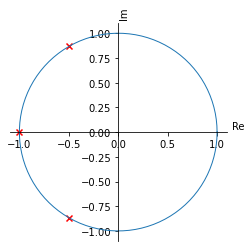

In [2]:
n = 3
# for some reason, Peter uses 0 to 2n-1, instead
# of just using 1 to 2n... NO clue why, but it 
# is the same output.
# however when plotting from 2n, then you get H(-s)
# we only want H(s)
polesPeter = butterPolesOut(0, 2*n-1, n)
poles = butterPolesOut(1, n)
plotPoles(poles)
for i in range(3):
    display(poles[i])

Keep in mind, that we muliply with $\Omega_c$, as that is our amplitude/magnitude ( I AM NOT SURE WHAT IS WHAT! ), but it is illustrated below:

![sketch3](figs/mm7-3.png)

Now that we have the poles, we can put in into the standard form for a transfer function, where we have three poles.
Note that I will be using $p$ instead of $s$ to denote polls, as everything else might cause confusion:

$$
H(s) = \frac{G}{(s-p_1)(s-p_2)(s-p_3)}
$$

Note that $p_2$ and $p_3$ are a complex conjugated pole pair, and we can therefore reduce it.

$$
\begin{align}
(s-p_2)(s-p_3)
&= s^2-sp_3-sp_2+p_2p_3 \\
p_2p_3
&= \Omega_c \left( e^{\frac{2i\pi}{3}} e^{-\frac{2i\pi}{3}} \right)
= \Omega_c \left( e^{\frac{2i\pi}{3}-\frac{2i\pi}{3}} \right)
= \Omega_c e^0 = \Omega_c \\
-sp_3-sp_2
&= -s(p_3+p_2)
= -s\Omega_c \left( e^{\frac{2i\pi}{3}} + e^{-\frac{2i\pi}{3}} \right)
= -s\Omega_c ( -1 ) = s\Omega_c \\
H(s) &= \frac{G}{(s+\Omega_c)(s^2+\Omega_c s + \Omega_c^2)}
\end{align}
$$

You can actually just put the complex conjugated into any program, and calculate the value and you will get $-1+0j$.

Now that we need to find our gain $G$ (0 dB DC Gain), to do this we use the following expression.

$$
\begin{align}
\left| H(s) \right| = \left. 1 \right|_{s=0} \\
\left| H(s) \right|_{s=0} = 1 &= \frac{G}{(s+\Omega_c)(s^2+\Omega_c s + \Omega_c^2)}
= \frac{G}{(0+\Omega_c)(0^2+\Omega_c 0 + \Omega_c^2)}
= \frac{G}{(\Omega_c)(\Omega_c^2)}
= \frac{G}{\Omega_c^3} \\
1 &= \frac{G}{\Omega_c^3}
\Rightarrow  G = \Omega_c^3 \\
H(s) &= \frac{\Omega_c^3}{(s+\Omega_c)(s^2+\Omega_c s + \Omega_c^2)}
\end{align}
$$

Now we need to apply the bilinear transformation on this transfer function, to transform it into a digital equivalent.
We need to use these two equations (check notes as well, they are there too!).

$$
\begin{align}
s &= \frac{2}{T_d} \cdot \frac{z-1}{z+1} \\
\Omega_c &= \frac{2}{T_d} \cdot \tan{(\frac{\omega_c}{2})}
\end{align}
$$

If we look at the equations for, we can short out $\frac{2}{T_d}$, we can easily prove this by substituting $s=T \cdot x$ and $\Omega_c= T \cdot y$, note that T has nothing to do with ANYTHING else, it is just a substitute.

$$
\begin{align}
\frac{(Ty)^3}{(Tx+Ty)((Tx)^2+TxTy + (Ty)^2)} \\
\frac{(Ty)^3}{T(x+y)T^2(x^2+xy + y^2)} \\
\frac{y^3}{(x+y)(x^2+xy + y^2)} \\
\end{align}
$$

This then give us the following equation, if we wait with substituting $\Omega_c$ in.

$$
H(z) = \frac{\Omega_c^3}{(\frac{z-1}{z+1}+\Omega_c)((\frac{z-1}{z+1})^2+ \frac{z-1}{z+1} \Omega_c + \Omega_c^2)}
$$

This is somewhat done in the Python below, the only thing needed now is to multiply the denominotor and numinator with $z^{-1}$, not 100% sure however.
Do note that our fraction gets reduced and inserted in the denominator, but take it out front.

In [8]:
# symbols
W, s, z = sp.symbols("\Omega_c s z")
# our expression
exp = W**3 / ((s+W)*(s**2+s*W+W**2))

# out bilinear transformation substitutes
sExpSub = (z-1)/(z+1)
WExpSub = sp.tan((sp.pi/4)/2)

# substitute in our bilinear values
expSubS = exp.subs({s: sExpSub, W: WExpSub})
bilExp = expSubS.evalf(5).simplify()
display(bilExp)

# get our numerator/denumertarer seperately
# so that we can normalize our equation
n, d = sp.fraction(bilExp)
nc = sp.poly(n).coeffs()
dc = sp.poly(d).coeffs()

# normalize our transfer function so that
# a_0 = 1 and b_0 = 1!
aMul = (1/nc[0])
bMul = (1/dc[0])

# multiply with the above to normalize.
# what we actually are doing, is just moving 
# 0.0701068 and 2.2426 out front
ncf =  (aMul*n).expand()
dcf =  (bMul*d).expand()

# display it, but not 100% done
display((nc[0]/dc[0])*(ncf/(dcf)))

1.0*(0.071068*z**3 + 0.2132*z**2 + 0.2132*z + 0.071068)/(2.2426*z**3 - 3.2721*z**2 + 2.0416*z - 0.44365)

0.031689*(1.0*z**3 + 3.0*z**2 + 3.0*z + 1.0)/(1.0*z**3 - 1.459*z**2 + 0.91037*z - 0.19783)

We take the first equation we get, and start from there on out

$$
H(z) =
\frac{
0.071068 z^{3} + 0.2132 z^{2} + 0.2132 z + 0.071068
}{
2.2426 z^{3} - 3.2721 z^{2} + 2.0416 z - 0.44365
}
$$

Now we want to normalize this equation, so that we have $a_0 = 1$ and $b_0 = 1$, to do this we take 0.071068 out front, and 2.2426 out front (so we multiply in into our parenteses).
We do this by multiplying everything with 1 over the two values mentioned before, and multiplying with that.
Look below, should be fairly simple.

$$ 
\begin{align}
H(z) &=
\frac{
0.071068
(1 z^{3} + 3 z^{2} + 3 z + 1)
}{
2.2426
(1.0 z^{3} - 1.459 z^{2} + 0.91037 z - 0.19783)
} \\
&=
\frac{0.071068}{2.2426}
\frac{
(1 z^{3} + 3 z^{2} + 3 z + 1)
}{
(1.0 z^{3} - 1.459 z^{2} + 0.91037 z - 0.19783)
} \\
&=
0.03169
\frac{
1 z^{3} + 3 z^{2} + 3 z + 1
}{
1.0 z^{3} - 1.459 z^{2} + 0.91037 z - 0.19783
} \\
\end{align}
$$

Now we still need to normalize it in regards to our $z^{3}$, to do this we just multiply with $z^{-3}$ as our basic exponent rule is $c^ac^b=c^{a+b}$

$$ 
\begin{align}
H(z)
&=
0.03169
\frac{
1 z^{3} + 3 z^{2} + 3 z + 1
}{
1.0 z^{3} - 1.459 z^{2} + 0.91037 z - 0.19783
} \\
&=
0.03169
\frac{z^{-3}}{z^{-3}}
\frac{
1 z^{3} + 3 z^{2} + 3 z + 1
}{
1.0 z^{3} - 1.459 z^{2} + 0.91037 z - 0.19783
} \\
&=
0.03169
\frac{
1 z + 3 z^{-1} + 3 z^{-2} + 1 z^{-3}
}{
1.0 z - 1.459 z^{-1} + 0.91037 z^{-2} - 0.19783 z^{-3}
} \\
\end{align}
$$

Now we have it in the standard normalized form, like it is seen on the slides.

TODO! Add the constant notation of H(z) = sum_n=0^i b_n z... / a_v z...

# RANDOM GARBAGE

In [4]:
n = 2
om = np.array([0.750, 1.5])*np.pi*2*10**3 # lower, upper
z, p, k = signal.butter(n, om, 'bandpass', 's', output='zpk') # 's' => True (analog)

fs = 8*10**3

z, p, k = signal.bilinear_zpk(z, p, k, fs)
display(z, p, k)

array([ 1.+0.j,  1.+0.j, -1.+0.j, -1.+0.j])

array([0.71067091-0.49694637j, 0.71067091+0.49694637j,
       0.45908104+0.67325382j, 0.45908104-0.67325382j])

0.04442508504520814

In [5]:
omega_c, s = sp.symbols("\Omega_c s", positive=True)
p1 = poles[0]
p2 = sp.exp((2*sp.pi*1j)/3)
p3 = sp.exp(-(2*sp.pi*1j)/3)
#p3 = poles[2]

display(p1,p2,p3)
#sp.factor((s-p2)*(s-p3))
display(p2+p3)
sp.simplify(p2+p3).evalf()

exp(2*I*pi/3)

exp(0.666666666666667*I*pi)

exp(-0.666666666666667*I*pi)

exp(-0.666666666666667*I*pi) + exp(0.666666666666667*I*pi)

-1.00000000000000

In [6]:
fs = 8 * 10**3
W1 = 750
W2 = 1500
WC = 10**3

w1 = (2 * sp.pi * W1)/fs
w2 = (2 * sp.pi * W2)/fs
wc = (2 * sp.pi * WC)/fs
display(w1, w2, wc)

wp1 = (2/(w1/W1))*sp.tan(w1/2)
wp2 = (2/(w2/W2))*sp.tan(w2/2)
wpc = (2/(wc/WC))*sp.tan(wc/2)
print(wp1, wp2, wpc)

# ming filter order calculation
butterworthFilterOrder(wp1, wp2, 10, 1)

3*pi/16

3*pi/8

pi/4

8000*tan(3*pi/32)/pi 8000*(-sqrt(1/2 - sqrt(2)/4)/sqrt(sqrt(2)/4 + 1/2) + 1/sqrt(sqrt(2)/4 + 1/2))/pi 8000*(-1 + sqrt(2))/pi


-2.246760235326481